In [1]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('index2018.csv')
df=data.copy()

In [3]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df.shape

(6269, 5)

In [5]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [7]:
from matplotlib import pyplot as plt

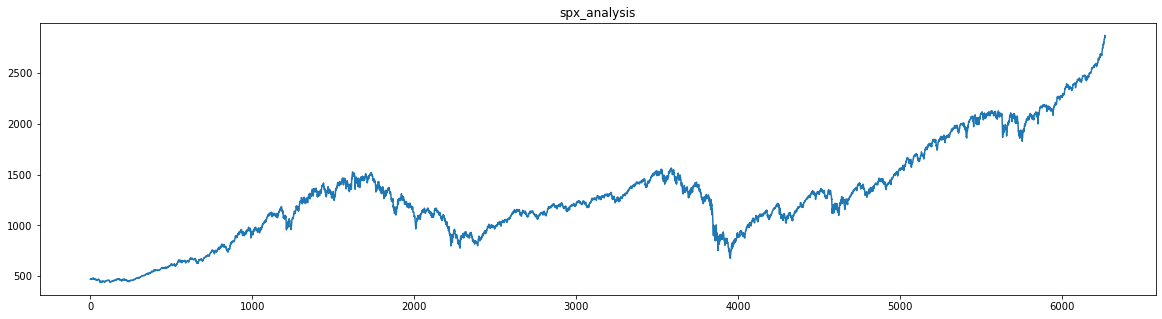

In [8]:
df['spx'].plot(figsize=(20,5), title= 'spx_analysis' )
plt.show()

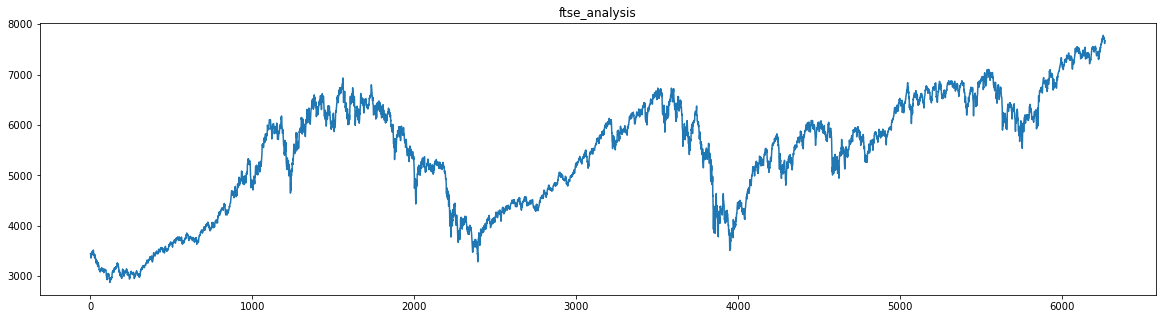

In [9]:
df['ftse'].plot(figsize=(20,5), title= 'ftse_analysis' )
plt.show()

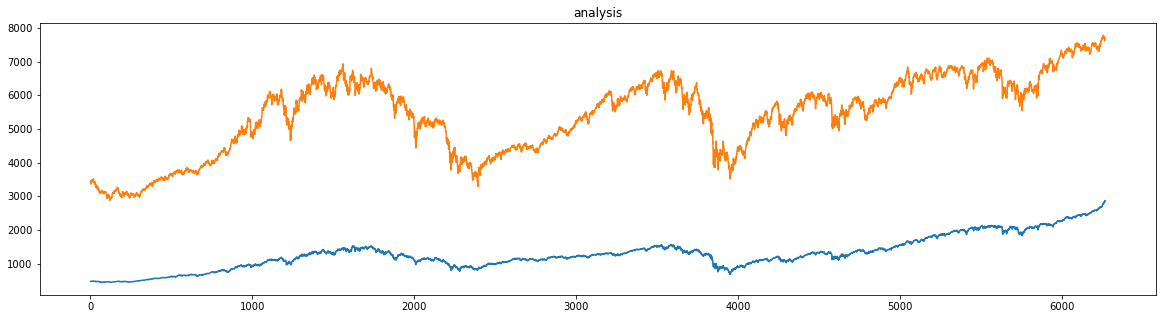

In [10]:
df['spx'].plot(figsize=(20,5))
df['ftse'].plot(figsize=(20,5))
plt.title('analysis')
plt.show()

## qq plot

In [11]:
import scipy.stats
import pylab

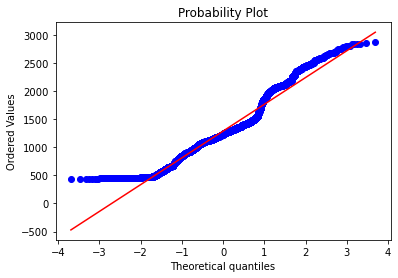

In [12]:
scipy.stats.probplot(df['spx'],plot=pylab)
pylab.show()

In [13]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [14]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [15]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [16]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)

In [17]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [18]:
df.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

In [19]:
df['date'].describe()

count                    6269
unique                   6269
top       1999-11-12 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [20]:
df.set_index('date',inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [21]:
df.asfreq('b')

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [22]:
df=df.asfreq('b')

In [23]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## handling the missing values 

In [24]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [25]:
df['spx']=df['spx'].fillna(method='ffill')

In [26]:
df.isnull().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [27]:
df['ftse']=df['ftse'].fillna(method='bfill')

In [28]:
df.isnull().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [29]:
df['dax']=df['dax'].fillna(df['dax'].mean())

In [30]:
df.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

## deleting and creating the new column

In [31]:
df['market value']=df['spx']

In [32]:
del df['spx'], df['dax']

In [33]:
df.head()

,ftse,nikkei,market value
date,,,
1994-01-07,3445.98,18124.01,469.90
1994-01-10,3440.58,18443.44,475.27
1994-01-11,3413.77,18485.25,474.13
1994-01-12,3372.02,18793.88,474.17
1994-01-13,3360.01,18577.26,472.47


## splitting up the data

In [34]:
size=int(len(df)*0.8)

In [35]:
size

5021

In [36]:
df_train=df.iloc[:size]

In [37]:
df_test=df.iloc[size:]

In [38]:
df_train.tail()

,ftse,nikkei,market value
date,,,
2013-04-01,6411.74,12135.02,1562.173837
2013-04-02,6490.66,12003.43,1570.252238
2013-04-03,6420.28,12362.20,1553.686978
2013-04-04,6344.11,12634.54,1559.979316
2013-04-05,6249.77,12833.64,1553.278930


In [39]:
df_test.head()

,ftse,nikkei,market value
date,,,
2013-04-08,6276.94,13192.59,1563.071269
2013-04-09,6313.20,13192.35,1568.607909
2013-04-10,6387.37,13288.13,1587.731827
2013-04-11,6416.14,13549.16,1593.369863
2013-04-12,6384.39,13485.14,1588.854623


## white noise

In [40]:
wn=np.random.normal(loc=df['market value'].mean(),scale=df['market value'].std(), size=len(df))

In [41]:
df['wn']=wn

In [42]:
df.describe()

,ftse,nikkei,market value,wn
count,6277.000000,6269.000000,6277.000000,6277.000000
mean,5423.690398,14597.055700,1288.642547,1301.635720
std,1145.568370,4043.122953,487.868210,494.677239
min,2876.600000,7054.980000,438.920000,-638.781437
25%,4487.880000,10709.290000,992.715221,966.433779
50%,5663.300000,15028.170000,1233.761241,1297.195911
75%,6304.630175,17860.470000,1460.250000,1639.197492
max,7778.637689,24124.150000,2872.867839,3067.758986


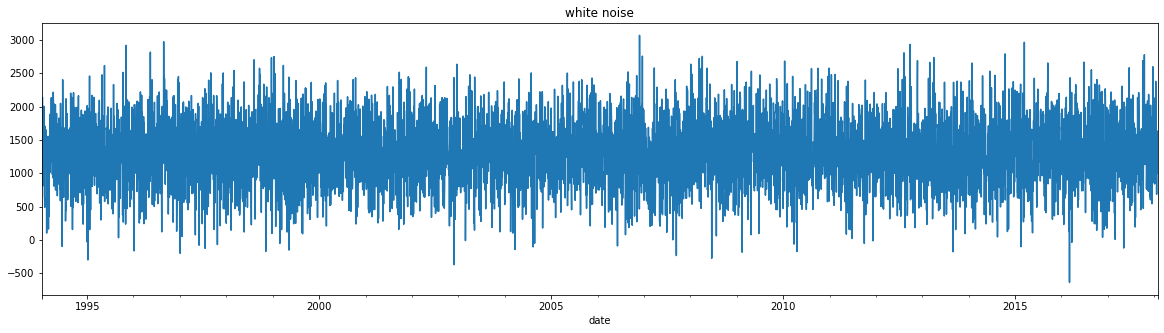

In [43]:
df.wn.plot(figsize=(20,5))
plt.title('white noise')
plt.show()

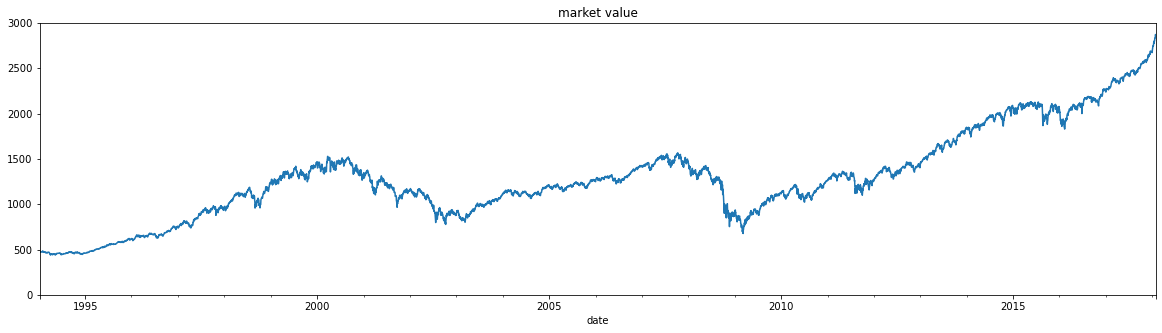

In [44]:
df['market value'].plot(figsize=(20,5))
plt.title('market value')
plt.ylim(0,3000)
plt.show()

## random walk

In [45]:
rw=pd.read_csv('RandWalk.csv')

In [46]:
rw.date=pd.to_datetime(rw.date,dayfirst=True)
rw.set_index('date',inplace=True)
rw=rw.asfreq('b')

In [47]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [48]:
df['rw']=rw.price
df.head()

,ftse,nikkei,market value,wn,rw
date,,,,,
1994-01-07,3445.98,18124.01,469.90,1000.486448,1122.139662
1994-01-10,3440.58,18443.44,475.27,893.103860,1080.347860
1994-01-11,3413.77,18485.25,474.13,1464.449642,1082.095245
1994-01-12,3372.02,18793.88,474.17,1577.877034,1083.639265
1994-01-13,3360.01,18577.26,472.47,2138.441676,1067.146255


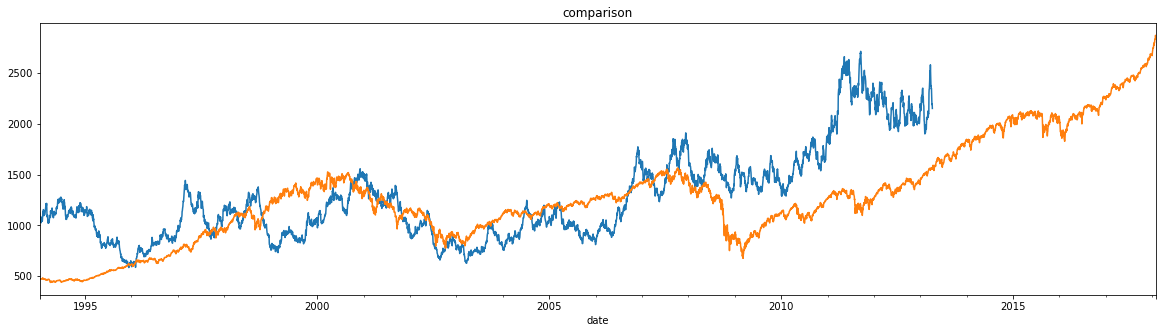

In [49]:
df.rw.plot(figsize=(20,5))
df['market value'].plot()
plt.title('comparison')
plt.show()

## stationarity

In [50]:
sts.adfuller(df['market value'])

(1.1194986381728411,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

In [51]:
sts.adfuller(df.wn)

(-56.88503910660818,
 0.0,
 1,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 95170.05920102847)

In [52]:
df.isnull().sum()

ftse               0
nikkei             8
market value       0
wn                 0
rw              1256
dtype: int64

In [53]:
df.rw=df.rw.fillna(method='ffill')

In [54]:
df.isnull().sum()

ftse            0
nikkei          8
market value    0
wn              0
rw              0
dtype: int64

In [55]:
## df test cant be applied if the column has null values, first we need to handle the missing values then apply df test for stationarity
sts.adfuller(df.rw)

(-1.3377157515360831,
 0.6117456205357743,
 24,
 6252,
 {'1%': -3.431396383066701,
  '5%': -2.8620024085488898,
  '10%': -2.5670161371235163},
 56526.358350839684)

## seasonality

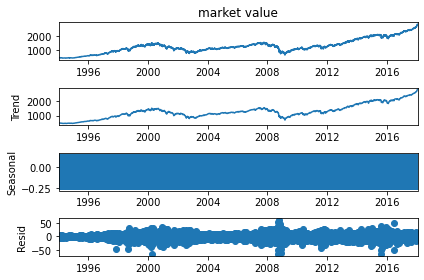

In [56]:
s_dec_additive=seasonal_decompose(df['market value'], model='additive')
s_dec_additive.plot()
plt.show()

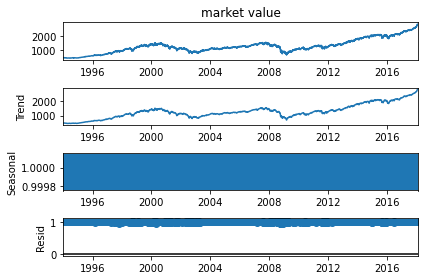

In [57]:
s_dec_multiplicative=seasonal_decompose(df['market value'], model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

In [58]:
## this prooves that there is no seasonality among market value prices

## ACF

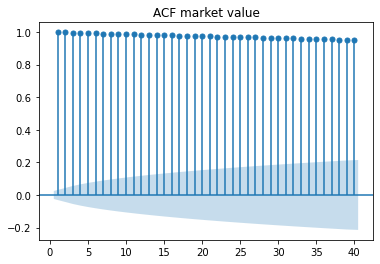

In [59]:
sgt.plot_acf(df['market value'],lags=40,zero=False)
plt.title('ACF market value')
plt.show()

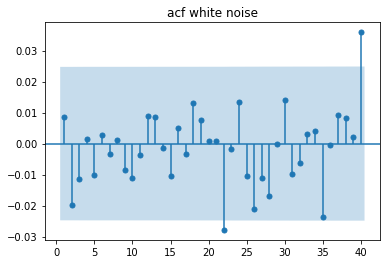

In [60]:
sgt.plot_acf(df.wn,lags=40,zero=False)
plt.title('acf white noise')
plt.show()

In [61]:
## lines lie within blue region that suggest there is no autocorrelation in white noise data

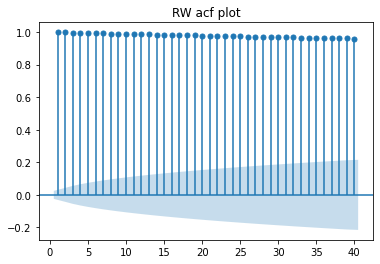

In [62]:
sgt.plot_acf(df.rw,lags=40,zero=False)
plt.title('RW acf plot')
plt.show()

## PACF

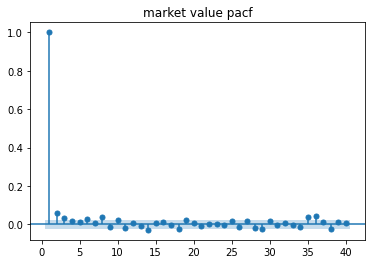

In [63]:
sgt.plot_pacf(df['market value'],lags=40,zero=False,method=('ols'))
plt.title('market value pacf')
plt.show()

In [64]:
##since most values after 3 perid are insignificant as the lie in blue region taht means there is no autocorrelation in market value pacf after 3 perid

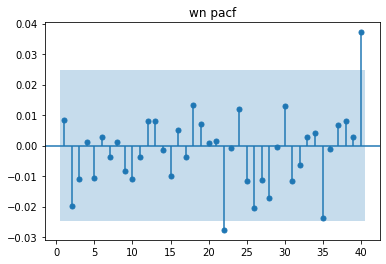

In [65]:
sgt.plot_pacf(df['wn'],lags=40,zero=False,method=('ols'))
plt.title('wn pacf')
plt.show()

In [66]:
##there is no autocorrelation(pacf) in white noise values as all values lie in blue region that makes it insignificant 

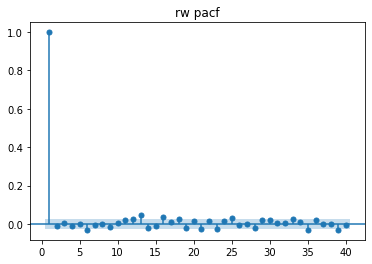

In [67]:
sgt.plot_pacf(df['rw'],lags=40,zero=False,method=('ols'))
plt.title('rw pacf')
plt.show()

In [68]:
df['spx']=df['market value']

In [69]:
df.head()

,ftse,nikkei,market value,wn,rw,spx
date,,,,,,
1994-01-07,3445.98,18124.01,469.90,1000.486448,1122.139662,469.90
1994-01-10,3440.58,18443.44,475.27,893.103860,1080.347860,475.27
1994-01-11,3413.77,18485.25,474.13,1464.449642,1082.095245,474.13
1994-01-12,3372.02,18793.88,474.17,1577.877034,1083.639265,474.17
1994-01-13,3360.01,18577.26,472.47,2138.441676,1067.146255,472.47


In [70]:
del df['market value']

In [71]:
df.head()

,ftse,nikkei,wn,rw,spx
date,,,,,
1994-01-07,3445.98,18124.01,1000.486448,1122.139662,469.90
1994-01-10,3440.58,18443.44,893.103860,1080.347860,475.27
1994-01-11,3413.77,18485.25,1464.449642,1082.095245,474.13
1994-01-12,3372.02,18793.88,1577.877034,1083.639265,474.17
1994-01-13,3360.01,18577.26,2138.441676,1067.146255,472.47


In [72]:
df['market_value']=df['ftse']
del df['ftse']

In [73]:
df.head()

,nikkei,wn,rw,spx,market_value
date,,,,,
1994-01-07,18124.01,1000.486448,1122.139662,469.90,3445.98
1994-01-10,18443.44,893.103860,1080.347860,475.27,3440.58
1994-01-11,18485.25,1464.449642,1082.095245,474.13,3413.77
1994-01-12,18793.88,1577.877034,1083.639265,474.17,3372.02
1994-01-13,18577.26,2138.441676,1067.146255,472.47,3360.01


## AR(1) Model

In [74]:
model_ar_1=ARMA(df.market_value,order=(1,0))
result_ar_1=model_ar_1.fit()
result_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -34437.973
Method:                       css-mle   S.D. of innovations             58.378
Date:                Tue, 01 Feb 2022   AIC                          68881.945
Time:                        12:11:20   BIC                          68902.179
Sample:                    01-07-1994   HQIC                         68888.956
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5425.4223    659.857      8.222      0.000    4132.127    6718.718
ar.L1.market_value     0.9990      0.001   1714.155      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           +0.0000j            1.0010            0.0000
-----------------------------------------------------------------------------
"""

## higher lag ar model

In [75]:
model_ar_2=ARMA(df.market_value,order=(2,0))
result_ar_2=model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34437.757
Method:                       css-mle   S.D. of innovations             58.376
Date:                Tue, 01 Feb 2022   AIC                          68883.514
Time:                        12:11:20   BIC                          68910.492
Sample:                    01-07-1994   HQIC                         68892.861
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6908    666.875      8.133      0.000    4116.640    6730.742
ar.L1.market_value     0.9907      0.013     78.772      0.000       0.966       1.015
ar.L2.market_value     0.0083      0.013      0.659      0.510      -0.016       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2         -120.3989           +0.0000j          120.3989            0.5000
-----------------------------------------------------------------------------
"""

In [76]:
model_ar_3=ARMA(df.market_value,order=(3,0))
result_ar_3=model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(3, 0)   Log Likelihood              -34430.458
Method:                       css-mle   S.D. of innovations             58.308
Date:                Tue, 01 Feb 2022   AIC                          68870.917
Time:                        12:11:21   BIC                          68904.640
Sample:                    01-07-1994   HQIC                         68882.601
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6908    708.241      7.658      0.000    4035.564    6811.818
ar.L1.market_value     0.9903      0.013     78.924      0.000       0.966       1.015
ar.L2.market_value    -0.0394      0.018     -2.227      0.026      -0.074      -0.005
ar.L3.market_value     0.0482      0.013      3.823      0.000       0.023       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2           -0.0914           -4.5516j            4.5525           -0.2532
AR.3           -0.0914           +4.5516j            4.5525            0.2532
-----------------------------------------------------------------------------
"""

In [77]:
model_ar_4=ARMA(df.market_value,order=(4,0))
result_ar_4=model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.723
Method:                       css-mle   S.D. of innovations             58.227
Date:                Tue, 01 Feb 2022   AIC                          68855.446
Time:                        12:11:21   BIC                          68895.914
Sample:                    01-07-1994   HQIC                         68869.468
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.9448    757.075      7.164      0.000    3940.105    6907.784
ar.L1.market_value     0.9878      0.013     78.888      0.000       0.963       1.012
ar.L2.market_value    -0.0374      0.018     -2.114      0.035      -0.072      -0.003
ar.L3.market_value    -0.0040      0.018     -0.225      0.822      -0.039       0.031
ar.L4.market_value     0.0527      0.013      4.183      0.000       0.028       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2            1.0287           -2.3012j            2.5206           -0.1831
AR.3            1.0287           +2.3012j            2.5206            0.1831
AR.4           -2.9825           -0.0000j            2.9825           -0.5000
-----------------------------------------------------------------------------
"""

## LLR test

In [78]:
def llr_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    P=chi2.sf(LR,DF).round(3)
    return P

## comparing higher lag-AR models

In [79]:
llr_test(model_ar_1,model_ar_2)

0.511

llr_test(model_ar_2,model_ar_3)

In [80]:
llr_test(model_ar_3,model_ar_4)

0.0

In [81]:
model_ar_4=ARMA(df.market_value,order=(4,0))
result_ar_4=model_ar_4.fit()
print(result_ar_4.summary())
print('LLR TEST :' + str(llr_test(model_ar_3,model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.723
Method:                       css-mle   S.D. of innovations             58.227
Date:                Tue, 01 Feb 2022   AIC                          68855.446
Time:                        12:11:23   BIC                          68895.914
Sample:                    01-07-1994   HQIC                         68869.468
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.9448    757.075      7.164      0.000    3940.105    6907.784
ar.L1.market_value     0.9878      0.013     78.888      0.000       0.963       1.012
ar.L2.market_value  

In [82]:
model_ar_5=ARMA(df.market_value,order=(5,0))
result_ar_5=model_ar_5.fit()
print(result_ar_5.summary())
print('LLR TEST :' + str(llr_test(model_ar_4,model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(5, 0)   Log Likelihood              -34421.466
Method:                       css-mle   S.D. of innovations             58.224
Date:                Tue, 01 Feb 2022   AIC                          68856.933
Time:                        12:11:25   BIC                          68904.145
Sample:                    01-07-1994   HQIC                         68873.291
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6910    748.544      7.246      0.000    3956.571    6890.811
ar.L1.market_value     0.9883      0.013     78.791      0.000       0.964       1.013
ar.L2.market_value  

In [83]:
model_ar_6=ARMA(df.market_value,order=(6,0))
result_ar_6=model_ar_6.fit()
print(result_ar_6.summary())
print('LLR TEST :' + str(llr_test(model_ar_5,model_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(6, 0)   Log Likelihood              -34416.799
Method:                       css-mle   S.D. of innovations             58.180
Date:                Tue, 01 Feb 2022   AIC                          68849.598
Time:                        12:11:28   BIC                          68903.555
Sample:                    01-07-1994   HQIC                         68868.293
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5781.9546    955.195      6.053      0.000    3909.808    7654.102
ar.L1.market_value     0.9886      0.012     79.235      0.000       0.964       1.013
ar.L2.market_value  

In [84]:
model_ar_7=ARMA(df.market_value,order=(7,0))
result_ar_7=model_ar_7.fit()
print(result_ar_7.summary())
print('LLR TEST :' + str(llr_test(model_ar_6,model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(7, 0)   Log Likelihood              -34414.381
Method:                       css-mle   S.D. of innovations             58.158
Date:                Tue, 01 Feb 2022   AIC                          68846.761
Time:                        12:11:32   BIC                          68907.463
Sample:                    01-07-1994   HQIC                         68867.793
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6908    814.700      6.657      0.000    3826.908    7020.473
ar.L1.market_value     0.9876      0.012     79.036      0.000       0.963       1.012
ar.L2.market_value  

In [85]:
model_ar_8=ARMA(df.market_value,order=(8,0))
result_ar_8=model_ar_8.fit()
print(result_ar_8.summary())
print('LLR TEST :' + str(llr_test(model_ar_7,model_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(8, 0)   Log Likelihood              -34414.345
Method:                       css-mle   S.D. of innovations             58.158
Date:                Tue, 01 Feb 2022   AIC                          68848.690
Time:                        12:11:37   BIC                          68916.136
Sample:                    01-07-1994   HQIC                         68872.059
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6908    811.071      6.687      0.000    3834.021    7013.361
ar.L1.market_value     0.9876      0.013     78.997      0.000       0.963       1.012
ar.L2.market_value  

In [86]:
print('llr test :'+str(llr_test(model_ar_1,model_ar_7,DF=6))) ##higher lags is used for non stationary data in time series, so higher "ar" models is used in non stationary data 

llr test :0.0


## the df test (for ftse value i.e. market_value)

In [87]:
sts.adfuller(df.market_value)

(-1.5988336219620523,
 0.4841793579044604,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68477.33735716512)

In [88]:
## p value is .48 and if p>.05 this prooves the presence of non stationarity and test statistics values are greater than critical value this also shows that data is non stationary

## using returns

In [89]:
df['returns']=df.market_value.pct_change(1).mul(100)
df=df.iloc[1:]

In [90]:
## since test statistics is very less than the critical values so we can say that time series is stationary in nature

## plotting ACF and PACF for returns

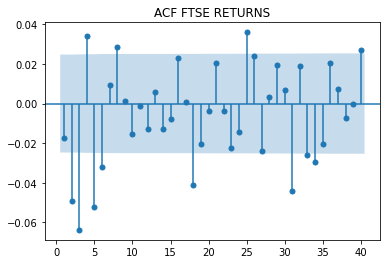

In [91]:
sgt.plot_acf(df.returns[1:],lags=40,zero=False)
plt.title('ACF FTSE RETURNS')
plt.show()

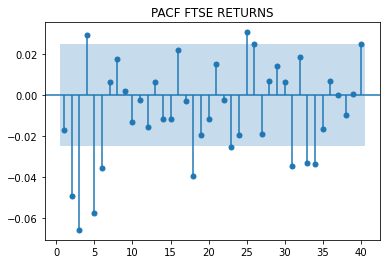

In [92]:
sgt.plot_pacf(df.returns,lags=40,zero=False,method=('ols'))
plt.title('PACF FTSE RETURNS')
plt.show()

## analysing residuals

In [93]:
df['res_price']=model_ar_7.fit().resid

In [94]:
df.res_price.mean()

0.7921103298577428

In [95]:
df.res_price.var()

3381.766158081482

In [96]:
sts.adfuller(df.res_price)

(-79.22250594741773,
 0.0,
 0,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 68455.6428523947)

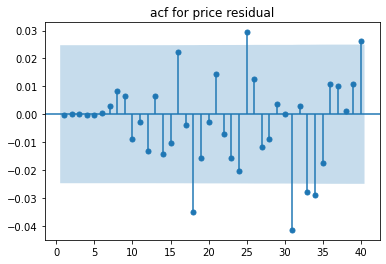

In [97]:
sgt.plot_acf(df.res_price,zero=False,lags=40)
plt.title('acf for price residual')
plt.show()